In [40]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [41]:
# define column names
cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']

In [42]:
dataset = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data",header=None)
dataset.columns = cols

In [43]:
# Encoding the Dependent Variable
from sklearn.preprocessing import LabelEncoder
labelencoder_y = LabelEncoder()
dataset["class"] = labelencoder_y.fit_transform(dataset["class"])

In [44]:
dataset.tail()

,sepal_length,sepal_width,petal_length,petal_width,class
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [45]:
#shuffle the dataset
from sklearn.utils import shuffle
dataset = shuffle(dataset)
dataset = dataset.reset_index(drop=True)

In [46]:
X = dataset.iloc[:, 0:4].values
y = dataset.iloc[:, 4:].values

In [47]:
print (X.shape)
print (y.shape)

(150, 4)
(150, 1)


In [48]:
#Split Data
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.33)

In [49]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(100, 4)
(100, 1)
(50, 4)
(50, 1)


In [50]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

In [51]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(100, 4)
(100, 1)
(50, 4)
(50, 1)


In [52]:
# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(X_train, y_train.ravel())

# predict the response
y_pred = classifier.predict(X_test)

# evaluate accuracy
print(classifier.score(X_test, y_test))

0.98


In [53]:
#cross validation
from sklearn.model_selection import KFold # import KFold
kf = KFold(n_splits=10) # Define the split - into 10 folds 
print(kf.get_n_splits(X_train)) # returns the number of splitting iterations in the cross-validator
print(kf)

10
KFold(n_splits=10, random_state=None, shuffle=False)


In [54]:
for train_index, test_index in kf.split(X_train):
    print(len(train_index),len(test_index))

X_train.shape

90 10
90 10
90 10
90 10
90 10
90 10
90 10
90 10
90 10
90 10


(100, 4)

In [77]:
from statistics import mean
avgerror = []
error =[]
kvalue =[]
for k in range(1,50):
    error =[]
    for train_index, test_index in kf.split(X_train):
         #print("TRAIN:", train_index, "TEST:", test_index)
        x_trainCV, x_testCV = X_train[train_index], X_train[test_index]
        y_trainCV, y_testCV = y_train[train_index], y_train[test_index]

        classifier = KNeighborsClassifier(n_neighbors = k)
        classifier.fit(x_trainCV, y_trainCV.ravel())

        # predict the response
        y_pred = classifier.predict(x_testCV)

        # evaluate accuracy
        #print(1 - classifier.score(x_testCV, y_testCV))
        temp= 1 - classifier.score(x_testCV, y_testCV)
        error.append(round(temp,2))
    
    avgerror.append(round(mean(error),2))
    kvalue.append(k)

In [85]:
#kvalue

In [86]:
#avgerror

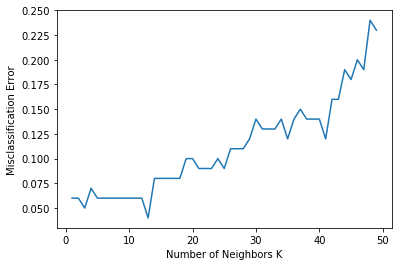

In [80]:
import matplotlib.pyplot as plt
plt.plot(kvalue,avgerror)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [84]:
# Fitting K-NN to the Training set with optimal k
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors = 3)
classifier.fit(X_train, y_train.ravel())

# predict the response
y_pred = classifier.predict(X_test)

# evaluate accuracy
print(classifier.score(X_test, y_test))

0.96


## Quick summary of KNN

The algorithm can be summarized as:

### A positive integer k is specified, along with a new sample
### We select the k entries in our database which are closest to the new sample
### We find the most common classification of these entries
### This is the classification we give to the new sample

## A few other features of KNN:

KNN stores the entire training dataset which it uses as its representation.
KNN does not learn any model.
KNN makes predictions just-in-time by calculating the similarity between an input sample and each training instance.